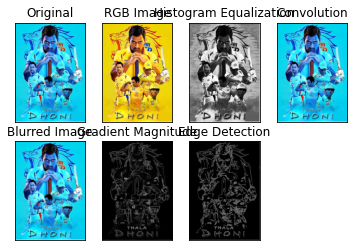

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('csk.jpg', cv2.IMREAD_COLOR)

# 1. Color Space Conversion (BGR to RGB)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 2. Histogram Equalization (for improving contrast)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_eq = cv2.equalizeHist(gray)

# 3. Convolution (for filtering)
kernel = np.ones((3, 3), np.float32) / 9  # Simple averaging filter
conv_img = cv2.filter2D(img, -1, kernel)

# 4. Image Smoothing (Blurring)
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# 5. Gradient Detection (using Sobel operator)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobel_x, sobel_y)

# 6. Edge Detection using Canny Filter
edges = cv2.Canny(gray, 100, 200)

# Display results
titles = ['Original', 'RGB Image', 'Histogram Equalization', 'Convolution', 
          'Blurred Image', 'Gradient Magnitude', 'Edge Detection']
images = [img, img_rgb, hist_eq, conv_img, blurred, gradient, edges]

for i in range(7):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], cmap='gray' if i != 1 else None)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
